# Imports

Let's import some tools to get things started.

In [1]:
import pandas as pd
from os import listdir
from os.path import join
from collections import Counter
from seaborn import heatmap
from matplotlib import pyplot as plt
raw_data_path = '../../data/raw/'

# Inspecting the raw data files
The function below lets us view the column names for all of the csv files in the raw data directory.

In [2]:
def print_column_names(directory_path):
    """Prints file names and column names for every csv file in 
    the directory specified by the directory_path."""
    for file_name in listdir(raw_data_path):
        if file_name.endswith('csv'):
            file_path = join(raw_data_path, file_name)
            with open(file_path) as file:
                head = file.readline()
            print(file_name)
            for column in head.split(','):
                print('-', column)

print_column_names(raw_data_path)

MSeasons.csv
- Season
- DayZero
- RegionW
- RegionX
- RegionY
- RegionZ

MConferenceTourneyGames.csv
- Season
- ConfAbbrev
- DayNum
- WTeamID
- LTeamID

MSecondaryTourneyCompactResults.csv
- Season
- DayNum
- WTeamID
- WScore
- LTeamID
- LScore
- WLoc
- NumOT
- SecondaryTourney

MRegularSeasonDetailedResults.csv
- Season
- DayNum
- WTeamID
- WScore
- LTeamID
- LScore
- WLoc
- NumOT
- WFGM
- WFGA
- WFGM3
- WFGA3
- WFTM
- WFTA
- WOR
- WDR
- WAst
- WTO
- WStl
- WBlk
- WPF
- LFGM
- LFGA
- LFGM3
- LFGA3
- LFTM
- LFTA
- LOR
- LDR
- LAst
- LTO
- LStl
- LBlk
- LPF

MTeams.csv
- TeamID
- TeamName
- FirstD1Season
- LastD1Season

MSecondaryTourneyTeams.csv
- Season
- SecondaryTourney
- TeamID

MNCAATourneyCompactResults.csv
- Season
- DayNum
- WTeamID
- WScore
- LTeamID
- LScore
- WLoc
- NumOT

MRegularSeasonCompactResults.csv
- Season
- DayNum
- WTeamID
- WScore
- LTeamID
- LScore
- WLoc
- NumOT

MMasseyOrdinals.csv
- Season
- RankingDayNum
- SystemName
- TeamID
- OrdinalRank

MTeamCoaches.csv
-

## Inspecting the Compact Tournament results.
Based on the column names above it looks like we can get a simple overview of tournament results from the `MNCAATourneyCompactResults.csv` file.

In [3]:
file_path = join(raw_data_path, 'MNCAATourneyCompactResults.csv')
df = pd.read_csv(file_path)
df.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT
0,1985,136,1116,63,1234,54,N,0
1,1985,136,1120,59,1345,58,N,0
2,1985,136,1207,68,1250,43,N,0
3,1985,136,1229,58,1425,55,N,0
4,1985,136,1242,49,1325,38,N,0


In [13]:
df[['WTeamID', 'LTeamID']].value_counts().reset_index().pivot_table(index='WTeamID', columns='LTeamID').fillna(0)

0                                               ...                 \
LTeamID 1101 1102 1103 1104 1105 1106 1107 1108 1110 1111  ... 1453 1454 1455   
WTeamID                                                    ...                  
1104     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
1107     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
1112     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
1113     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
1114     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
...      ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
1458     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  ...  0.0  0.0  0.0   
1459     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
1461     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
1462     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
1463     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   

                                            
LTeamID 1457 1458 1459 1460 1461 1462 1463  
WTeamID                                     
1104     0.0  0.0  0.0  0.0  0.0  1.0  0.0  
1107     0.0  0.0  0.0  0.0  0.0  0.0  0.0  
1112     0.0  1.0  0.0  0.0  1.0  1.0  0.0  
1113     0.0  0.0  0.0  0.0  0.0  0.0  0.0  
1114     0.0  0.0  0.0  0.0  0.0  0.0  0.0  
...      ...  ...  ...  ...  ...  ...  ...  
1458     0.0  0.0  1.0  0.0  0.0  1.0  0.0  
1459     0.0  0.0  0.0  0.0  0.0  0.0  0.0  
1461     0.0  0.0  0.0  0.0  0.0  0.0  0.0  
1462     0.0  1.0  0.0  0.0  0.0  0.0  0.0  
1463     0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[202 rows x 300 columns]

### Outcome Matrix
Below we will create an all-time outcome matrix, which will count the total number of wins for every ordered tuple in the form `(WTeamID, LTeamID)`.

In [4]:
def compute_outcome_matrix(file_path, season=None):
    """Takes a file path to MNCAATourneyCompactResults.csv and returns 
    an outcome matrix for all Mens NCAA games. Given an optional season,
    outcomes are restricted to the season in question. 
    """
    df = pd.read_csv(file_path)
    if season:
        df = df[df['Season'] == season]
    team_ids_by_game = df[['WTeamID', 'LTeamID']]
    win_counts = team_ids_by_game.value_counts().reset_index()
    col_names = win_counts.columns.to_list()
    col_names[2] = 'Wins'
    win_counts.columns = col_names
    outcome_matrix = win_counts.pivot_table(values= 'Wins', index='WTeamID', columns='LTeamID').fillna(0)
    return outcome_matrix

In [5]:
def show_outcome_matrix(file_path, season=None):
    """Takes the file path to MNCAATourneyCompactResults.csv and 
    plots a heatmap of outcomes for all Mens NCAA games. Outcomes can be
    restricted to a specific season by passing a season."""
    outcome_matrix = compute_outcome_matrix(file_path, season)
    fig, ax = plt.subplots(figsize=(20,15));
    if season:
        ax.set_title(f'Outcome matrix for {season} season.')
    else:
        ax.set_title('All-Time Outcome Matrix');
    heatmap(outcome_matrix, cmap='Blues', ax=ax);
    return fig

#### All-time outcome heat map
Below, we see that the all-time outcome matrix is fairly sparse, with the majority of pairings having never occurred.

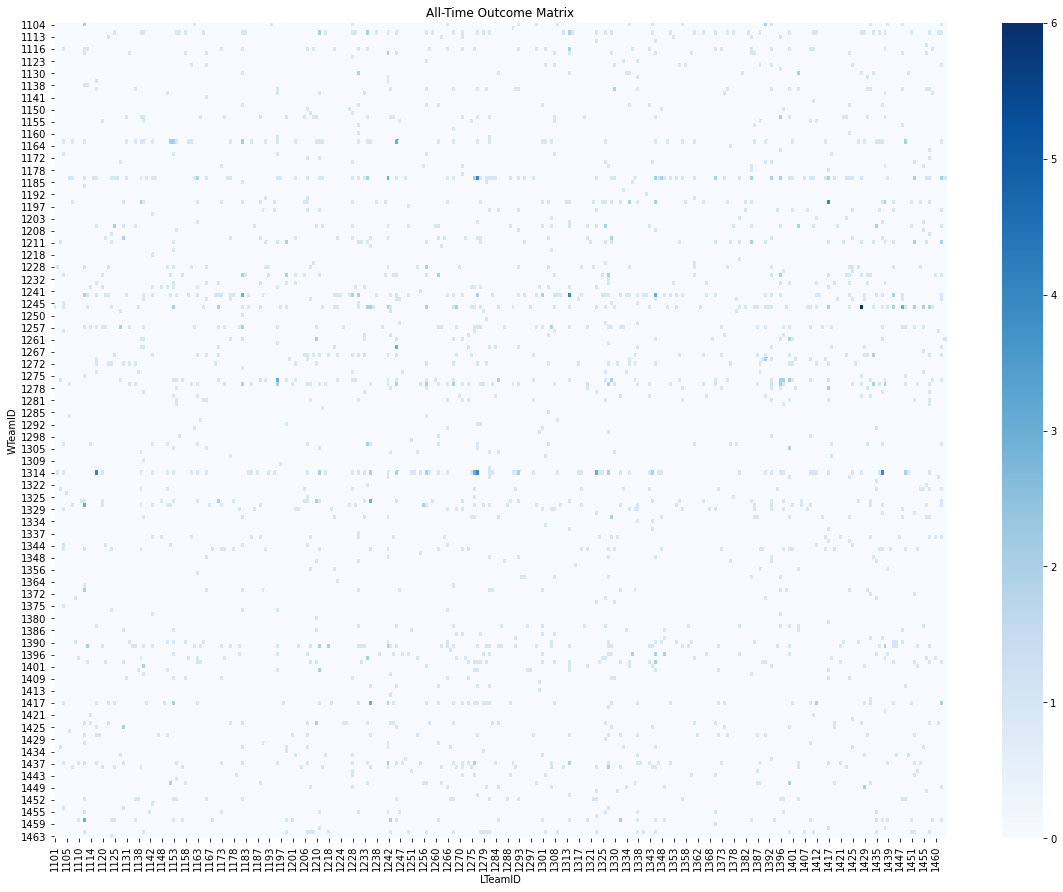

In [6]:
fig = show_outcome_matrix(file_path)

#### Outcome heat map for 2015 season
Below, we see that even seasonal data is sparse.

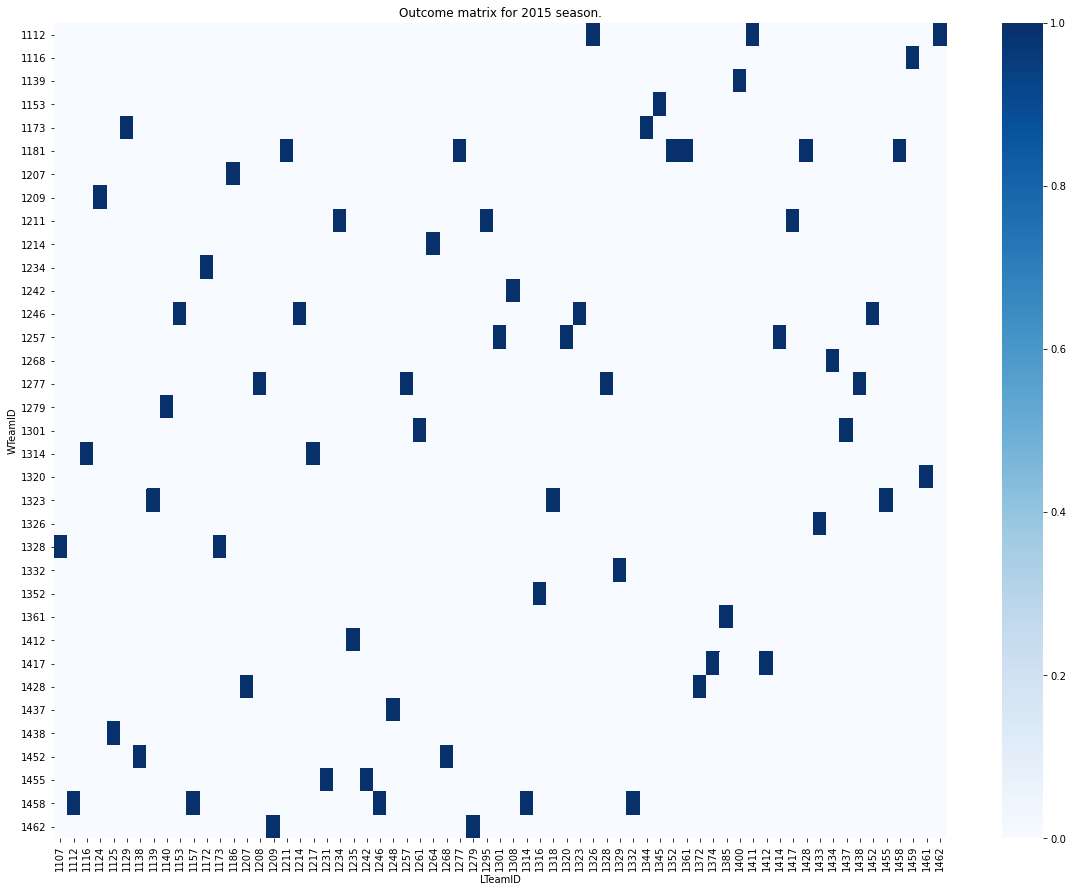

In [7]:
fig = show_outcome_matrix(file_path, season=2015)